In [407]:
import numpy as np
import copy 
import networkx as nx
import matplotlib.pyplot as plt


In [408]:
class SAT_2_MAP:
    def __init__(self, mat, num_colors, num_ver, inp="file.txt", out="out.txt"):
        self.inp = inp
        self.num_colors = num_colors
        self.num_ver = num_ver
        self.out = out
        self.mat = copy.deepcopy(mat)
    
    def num_color2k(self, num : int, color : int):
        return self.num_colors * num + color
    
    def k2num_color(self, k):
        return k % self.num_colors, k // self.num_colors
    
    
    def make_file(self):
        mat=self.mat
        num_ver=self.num_ver
        num_colors=self.num_colors
        filename=self.inp
        
        number_edge_x_2 = 0
        for i in mat:
            number_edge_x_2 +=len(i)

        f = open(filename, "w")
        f.write("p cnf " + str(num_ver * num_colors) + " " + 
                str(num_ver
                    + number_edge_x_2 * num_colors
                    + num_ver * num_colors * (num_colors - 1) // 2)
                + "\n"
               )

        #---------------------------------------------------------------
        for i in range(num_ver):
            s = ""
            for j in range(num_colors):
                s += str(num_color2k(i, j) + 1) + " "
            f.write(s+"0\n")
        # Уравнения x_i0 || x_i1 || ... x_i num_color
        # т.е. у каждой вершины есть цвет
        #---------------------------------------------------------------



        #---------------------------------------------------------------
        for ver in range(num_ver):

            for i in range(num_colors):
                for j in range(i + 1, num_colors):
                    f.write(
                            str(-(num_color2k(ver, i) + 1)) + ' '
                            + str(-(num_color2k(ver, j) + 1)) + ' '
                            +"0\n")
        # Уравнения -x_ver_i || -x_ver_j
        # т.е. оба цвета одновременно не 1
        #---------------------------------------------------------------



        #---------------------------------------------------------------
        for ver in range(num_ver):
            for ver1 in mat[ver]:
                for c in range(num_colors):
                    f.write(
                                str(-(num_color2k(ver, c) + 1)) + ' '
                                + str(-(num_color2k(ver1, c) + 1)) + ' '
                                +"0\n")
        #---------------------------------------------------------------


        f.close()


    def make_prediction(self):
        output=self.out
        
        f = open(output, "r")
        s = f.readline()

        if s != "SAT\n":
            print("UNSOLVE")
            return
        s = f.readline()
        res = [int(i) for i in s.split()]
        res = res[:-1]
        res = np.array(res).reshape((-1,num_colors))
        f.close()

        ans = []
        for i in res:
            for j in range(i.shape[0]):
                if i[j] > 0:
                    ans.append(j)
        return ans

    
    def solve(self):
        self.make_file()
        out=self.out
        !minisat file.txt -no-luby -rinc=1.5 -phase-saving=0 -rnd-freq=0.02 $out
        return make_prediction()

    
    def draw_graph(self):
        num_colors = self.num_colors
        num_ver = self.num_ver
        mat = self.mat
        
        res = Sat.solve()
        
        colors = {0:"blue", 1:"red", 2:"green", 3:"black"}
        ALL_COLORS = list(map(lambda i:colors[i], res))
        
        make_graph(mat, num_ver,ALL_COLORS)
  

    def make_graph(mat, num_ver, colors):
        G=nx.cubical_graph()
        nx.draw_networkx_nodes(G,pos,
                               nodelist=[i for i in range(num_ver)],
                               labels=[i for i in range(num_ver)],
                               node_color=colors,
                               node_size=30,
                               alpha=0.8,
                              with_labels=True)
        nx.draw_networkx_edges(G,pos,
                           edgelist=[(i,mat[i][j]) for i in range(len(mat)) for j in range(len(mat[i]))])
        

#         plt.axis('off')
#         plt.savefig("labels_and_colors.png") # save as png
        nx.draw(G, with_labels=True, font_weight='bold')
        

In [409]:
mat = [
    [1, 11,100,10,101,102,103,104,105,109],
    [0,2,11,12,109],
    [1,3,12,13,109],
    [2,4,13,14,109],
    [3,5,14,15,109],
    [4,6,15,16,109],
    [5,7,16,17,109],
    [6,8,17,18,109],
    [7,9,18,19,109],
    [8,19,109],
    [0,105,106,107,108,109],
    [0, 1, 12, 22,90,100],
    [1,2,11,13,22,23],
    [2,3,12,14,23,24],
    [3,4,13,15,24,25],
    [4,5,14,16,25,26],
    [5,6,15,17,26,27],
    [6,7,16,18,27,28],
    [7,8,17,19,28,29],
    [8,9,18,29,98,109],
    [88,99,21,30,31],
    [20,99,31,32,89],
    [11,12,23,33,80,90],
    [12,13,22,24,33,34],
    [13,14,23,25,34,35],
    [14,15,24,26,35,36],
    [15,16,25,27,36,37],
    [16,17,26,28,37,38],
    [17,18,27,29,38,39],
    [18,19,28,39,87,98],
    [20,31,40,41,77,88],
    [20,21,30,32,41,42],
    [21,31,42,43,79,89],
    [22,23,34,44,70,80],
    [23,24,33,35,44,45],
    [24,25,34,36,45,46],
    [25,26,35,37,46,47],
    [26,27,36,38,47,48],
    [27,28,37,39,48,49],
    [28,29,38,49,76,87],
    [66,77,30,41,50,51],
    [30,31,40,42,51,52],
    [31,32,41,43,52,53],
    [32,42,53,54,79,69],
    [33,34,45,55,60,70],
    [34,35,44,46,55,56],
    [35,36,45,47,56,57],
    [36,37,46,48,57,58],
    [37,38,47,49,58,59],
    [38,39,48,59,65,76],
    [40,51,60,61,55,66],
    [40,41,50,52,61,62],
    [41,42,51,53,62,63],
    [42,43,52,54,63,64],
    [43,53,64,65,69,59],
    [44,45,56,66,50,60],
    [45,46,55,57,66,67],
    [46,47,56,58,67,68],
    [47,48,57,59,68,69],
    [48,49,58,69,54,65],
    [50,61,70,71,44,55],
    [50,51,60,62,71,72],
    [51,52,61,63,72,73],
    [52,53,62,64,73,74],
    [53,54,63,65,74,75],
    [54,64,75,76,59,49],
    [55,56,67,77,50,40],
    [56,57,66,68,77,78],
    [57,58,67,69,78,79],
    [58,59,68,79,43,54],
    [71,80,81,60,33,44],
    [60,61,70,72,81,82],
    [61,62,71,73,82,83],
    [62,63,72,74,83,84],
    [63,64,73,75,84,85],
    [64,65,74,76,85,86],
    [65,75,86,87,39,49],
    [66,67,78,88,30,40],
    [67,68,77,79,88,89],
    [68,69,78,89,32,43],
    [70,81,91,90,22,33],
    [70,71,80,82,91,92],
    [71,72,81,83,92,93],
    [72,73,82,84,93,94],
    [73,74,83,85,94,95],
    [74,75,84,86,95,96],
    [75,76,85,87,96,97],
    [76,86,97,98,29,39],
    [77,78,89,99,20,30],
    [78,79,88,99,21,32],
    [80,91,101,100,11,22],
    [80,81,90,92,101,102],
    [81,82,91,93,102,103],
    [82,83,92,94,103,104],
    [83,84,93,95,104,105],
    [84,85,94,96,105,106],
    [85,86,95,97,106,107],
    [86,87,96,98,107,108],
    [87,97,108,109,19,29],
    [88,89,20,21],
    [0,11,90,101],
    [90,91,100,102,0],
    [91,92,101,103,0],
    [92,93,102,104,0],
    [93,94,103,105,0],
    [94,95,104,106,0,10],
    [95,96,105,107,10],
    [96,97,106,108,10],
    [97,98,107,109,10],
    [10,108,98,19,9,8,7,6,5,4,3,2,1,0]
    
    ]

In [410]:
N = 110
max_color = 4
Sat = SAT_2_MAP(mat, max_color, N)

In [411]:
res = Sat.solve()

============================[ Problem Statistics ]=============================
|                                                                             |
|  Number of variables:           440                                         |
|  Number of clauses:            3362                                         |
|  Parse time:                   0.00 s                                       |
|  Eliminated clauses:           0.00 Mb                                      |
|  Simplification time:          0.00 s                                       |
|                                                                             |
============================[ Search Statistics ]==============================
| Conflicts |          ORIGINAL         |          LEARNT          | Progress |
|           |    Vars  Clauses Literals |    Limit  Clauses Lit/Cl |          |
restarts              : 1
conflicts             : 7              (1711 /sec)
decisions             : 65             (0.0

In [412]:
i = -1
def func(x):
    global i
    i+=1
    return (i,x)
list(map(func, res))

[(0, 2),
 (1, 1),
 (2, 0),
 (3, 1),
 (4, 0),
 (5, 1),
 (6, 2),
 (7, 0),
 (8, 2),
 (9, 1),
 (10, 1),
 (11, 0),
 (12, 3),
 (13, 2),
 (14, 3),
 (15, 2),
 (16, 0),
 (17, 1),
 (18, 3),
 (19, 0),
 (20, 3),
 (21, 2),
 (22, 2),
 (23, 0),
 (24, 1),
 (25, 0),
 (26, 3),
 (27, 2),
 (28, 0),
 (29, 1),
 (30, 0),
 (31, 1),
 (32, 0),
 (33, 3),
 (34, 2),
 (35, 3),
 (36, 2),
 (37, 0),
 (38, 3),
 (39, 2),
 (40, 1),
 (41, 3),
 (42, 2),
 (43, 3),
 (44, 1),
 (45, 0),
 (46, 1),
 (47, 3),
 (48, 1),
 (49, 0),
 (50, 3),
 (51, 2),
 (52, 1),
 (53, 0),
 (54, 1),
 (55, 2),
 (56, 3),
 (57, 0),
 (58, 2),
 (59, 3),
 (60, 0),
 (61, 1),
 (62, 0),
 (63, 2),
 (64, 3),
 (65, 2),
 (66, 0),
 (67, 2),
 (68, 1),
 (69, 0),
 (70, 2),
 (71, 3),
 (72, 2),
 (73, 3),
 (74, 1),
 (75, 0),
 (76, 1),
 (77, 3),
 (78, 0),
 (79, 2),
 (80, 1),
 (81, 0),
 (82, 1),
 (83, 0),
 (84, 2),
 (85, 3),
 (86, 2),
 (87, 0),
 (88, 2),
 (89, 1),
 (90, 3),
 (91, 2),
 (92, 3),
 (93, 2),
 (94, 3),
 (95, 1),
 (96, 0),
 (97, 1),
 (98, 2),
 (99, 0),
 (100, 1),

============================[ Problem Statistics ]=============================
|                                                                             |
|  Number of variables:            16                                         |
|  Number of clauses:              52                                         |
|  Parse time:                   0.00 s                                       |
|  Eliminated clauses:           0.00 Mb                                      |
|  Simplification time:          0.00 s                                       |
|                                                                             |
============================[ Search Statistics ]==============================
| Conflicts |          ORIGINAL         |          LEARNT          | Progress |
|           |    Vars  Clauses Literals |    Limit  Clauses Lit/Cl |          |
restarts              : 1
conflicts             : 0              (0 /sec)
decisions             : 1              (0.00 %

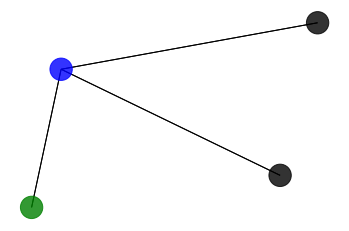

In [413]:
num_colors = 4
num_ver = 4
mat = [
    [1,2,3],
    [0],
    [0],
    [0],
    
]
Sat = SAT_2_MAP(mat,num_colors,num_ver)
res = Sat.draw_graph()


============================[ Problem Statistics ]=============================
|                                                                             |
|  Number of variables:            20                                         |
|  Number of clauses:              67                                         |
|  Parse time:                   0.00 s                                       |
|  Eliminated clauses:           0.00 Mb                                      |
|  Simplification time:          0.00 s                                       |
|                                                                             |
============================[ Search Statistics ]==============================
| Conflicts |          ORIGINAL         |          LEARNT          | Progress |
|           |    Vars  Clauses Literals |    Limit  Clauses Lit/Cl |          |
restarts              : 1
conflicts             : 0              (0 /sec)
decisions             : 1              (0.00 %

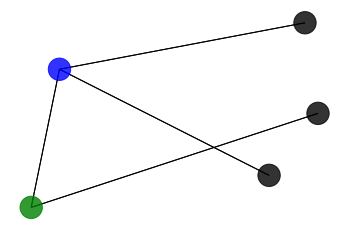

In [414]:
num_colors = 4
num_ver = 5
mat = [
    [1,2,3],
    [0],
    [0],
    [0,4],
    [3]
    
]
Sat = SAT_2_MAP(mat,num_colors,num_ver)
res = Sat.draw_graph()

============================[ Problem Statistics ]=============================
|                                                                             |
|  Number of variables:            20                                         |
|  Number of clauses:              75                                         |
|  Parse time:                   0.00 s                                       |
|  Eliminated clauses:           0.00 Mb                                      |
|  Simplification time:          0.00 s                                       |
|                                                                             |
============================[ Search Statistics ]==============================
| Conflicts |          ORIGINAL         |          LEARNT          | Progress |
|           |    Vars  Clauses Literals |    Limit  Clauses Lit/Cl |          |
restarts              : 1
conflicts             : 0              (0 /sec)
decisions             : 1              (0.00 %

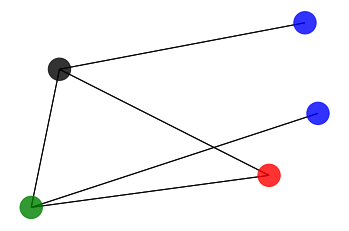

In [415]:
num_colors = 4
num_ver = 5
mat = [
    [1,2,3],
    [0],
    [0,3],
    [0,4,2],
    [3]
    
]
Sat = SAT_2_MAP(mat,num_colors,num_ver)
res = Sat.draw_graph()

============================[ Problem Statistics ]=============================
|                                                                             |
|  Number of variables:            20                                         |
|  Number of clauses:              83                                         |
|  Parse time:                   0.00 s                                       |
|  Eliminated clauses:           0.00 Mb                                      |
|  Simplification time:          0.00 s                                       |
|                                                                             |
============================[ Search Statistics ]==============================
| Conflicts |          ORIGINAL         |          LEARNT          | Progress |
|           |    Vars  Clauses Literals |    Limit  Clauses Lit/Cl |          |
restarts              : 1
conflicts             : 0              (0 /sec)
decisions             : 1              (0.00 %

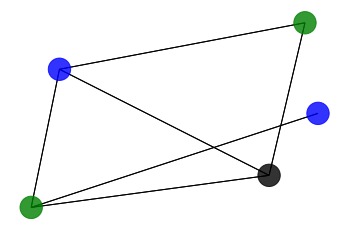

In [416]:
num_colors = 4
num_ver = 5
mat = [
    [1,2,3],
    [0,2],
    [0,3,1],
    [0,4,2],
    [3]
    
]
Sat = SAT_2_MAP(mat,num_colors,num_ver)
res = Sat.draw_graph()

============================[ Problem Statistics ]=============================
|                                                                             |
|  Number of variables:            24                                         |
|  Number of clauses:             106                                         |
|  Parse time:                   0.00 s                                       |
|  Eliminated clauses:           0.00 Mb                                      |
|  Simplification time:          0.00 s                                       |
|                                                                             |
============================[ Search Statistics ]==============================
| Conflicts |          ORIGINAL         |          LEARNT          | Progress |
|           |    Vars  Clauses Literals |    Limit  Clauses Lit/Cl |          |
restarts              : 1
conflicts             : 0              (0 /sec)
decisions             : 1              (0.00 %

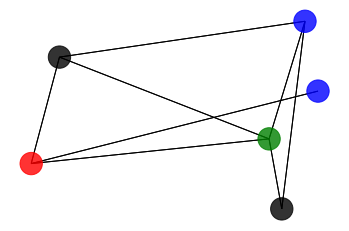

In [418]:
num_colors = 4
num_ver = 6
mat = [
    [1,2,3],
    [0,2,5],
    [0,3,1,5],
    [0,4,2],
    [3],
    [1,2]
    
]
Sat = SAT_2_MAP(mat,num_colors,num_ver)
res = Sat.draw_graph()

============================[ Problem Statistics ]=============================
|                                                                             |
|  Number of variables:            24                                         |
|  Number of clauses:             114                                         |
|  Parse time:                   0.00 s                                       |
|  Eliminated clauses:           0.00 Mb                                      |
|  Simplification time:          0.00 s                                       |
|                                                                             |
============================[ Search Statistics ]==============================
| Conflicts |          ORIGINAL         |          LEARNT          | Progress |
|           |    Vars  Clauses Literals |    Limit  Clauses Lit/Cl |          |
restarts              : 1
conflicts             : 0              (0 /sec)
decisions             : 1              (0.00 %

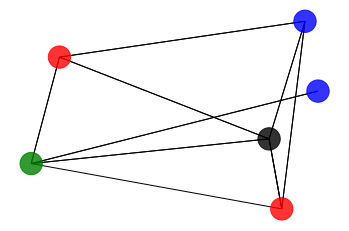

In [420]:
num_colors = 4
num_ver = 6
mat = [
    [1,2,3],
    [0,2,5],
    [0,3,1,5,5],
    [0,4,2],
    [3],
    [1,2,3]
    
]
Sat = SAT_2_MAP(mat,num_colors,num_ver)
res = Sat.draw_graph()